## Ejercicio Hierarchical_clustering - Bryan Rodríguez y Caren Amado

### Importación de librerias

In [3]:
#Carga de librerias:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

### 1. Análisis Exploratorio de los datos:

In [5]:
#Creación del DataSet
data = pd.read_csv('Mall_Customers.csv')
data.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
#Resumén de valores (Cantidad, Media, Cuartiles, etc):
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#Tipo de datos y valores por columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Edad')

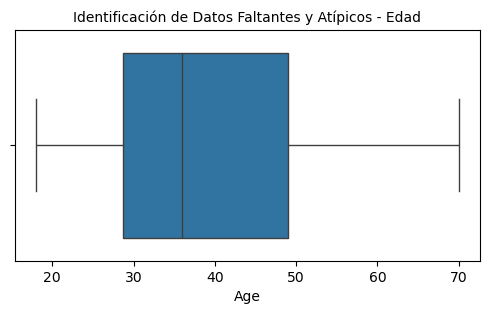

In [8]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age']) #Edad
plt.title('Identificación de Datos Faltantes y Atípicos - Edad', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Puntaje DataCrédito')

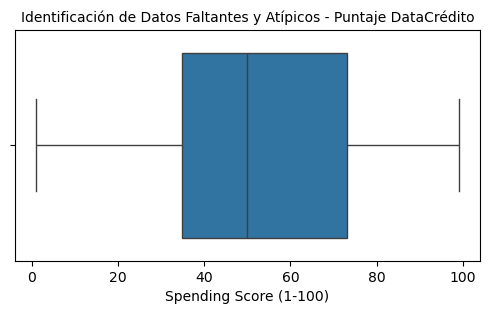

In [9]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Spending Score (1-100)']) #Puntaje DataCredito
plt.title('Identificación de Datos Faltantes y Atípicos - Puntaje DataCrédito', fontsize=10 )

### 2. Preprocesamiento de Datos:

In [11]:
#Identificación de columnas con datos faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
#Validación de datos Atípicos - Puntaje DataCrédito
nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((data['Spending Score (1-100)']<nivel_minimo)|(data['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos en Puntaje DataCrédito es: {}".format(Total_Atipicos))

El total de datos atípicos en Puntaje DataCrédito es: 0


In [13]:
#Validación de datos Atípicos - Edad
nivel_minimo=18
nivel_maximo=65
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos en Edad es: {}".format(Total_Atipicos))

El total de datos atípicos en Edad es: 12


In [14]:
#Filtro Datos Atípicos
Datos=data[(data['Age']<nivel_maximo)&(data['Age']>nivel_minimo)]

In [15]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              182 non-null    int64 
 1   Gender                  182 non-null    object
 2   Age                     182 non-null    int64 
 3   Annual Income (k$)      182 non-null    int64 
 4   Spending Score (1-100)  182 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.5+ KB


### 3. Selección de características: 

In [17]:
# Calcular el año actual
current_year = datetime.now().year

# Calcular el año de nacimiento y agregar como columna ''
Datos['Year_Birth'] = current_year - Datos['Age']

# Mostrar las primeras filas para verificar
Datos[['Year_Birth', 'Age']].head(5)

,Year_Birth,Age
0,2005,19
1,2003,21
2,2004,20
3,2001,23
4,1993,31


In [18]:
# Filtro columnas del modelo 
Datos1 = Datos[["Age","Year_Birth","Annual Income (k$)","Spending Score (1-100)"]]
# Revisión de los datos de las variables objetivo
Datos1.head(15)

,Age,Year_Birth,Annual Income (k$),Spending Score (1-100)
0,19,2005,15,39
1,21,2003,15,81
2,20,2004,16,6
3,23,2001,16,77
4,31,1993,17,40
5,22,2002,17,76
6,35,1989,18,6
7,23,2001,18,94
8,64,1960,19,3
9,30,1994,19,72


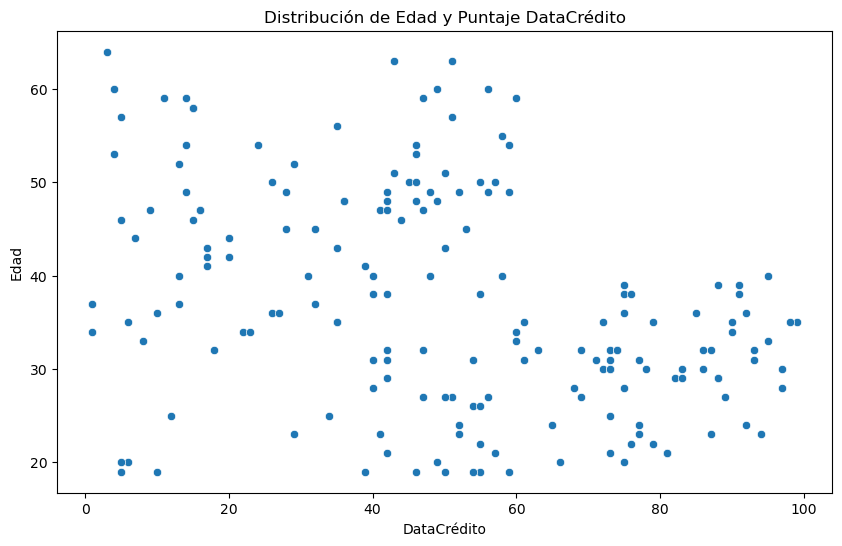

In [48]:
# Grafica antes del agrupamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Spending Score (1-100)'], y=Datos1['Age'])
plt.title('Distribución de Edad y Puntaje DataCrédito')
plt.xlabel('DataCrédito')
plt.ylabel('Edad')
plt.show()

### 4. Entrenamiento del Modelo

In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Year_Birth', 'Annual Income (k$)', 'Spending Score (1-100)']])

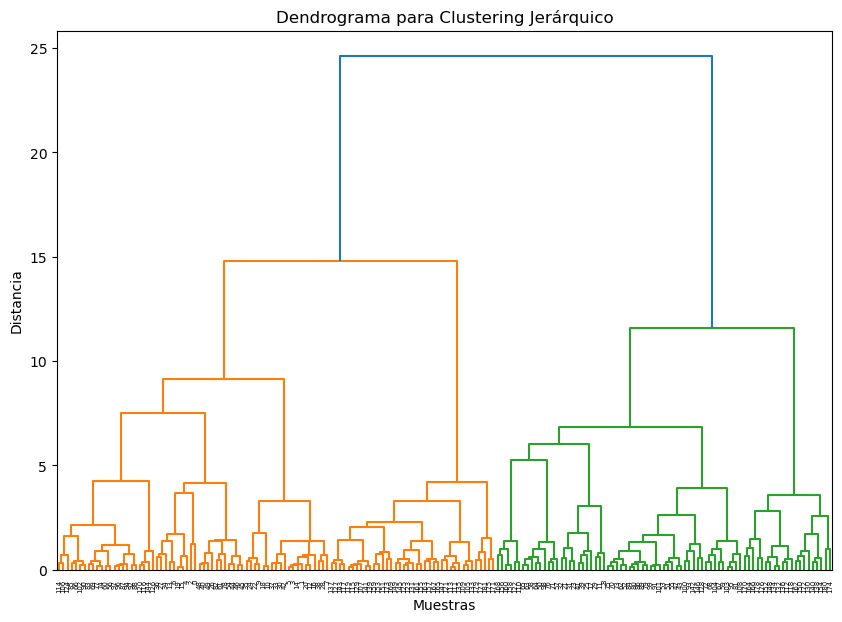

In [107]:
# Revisión y remplazo de valores
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Enlace Cluster Jerarquico
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

El entranamiento y agrupamiento realizado por el modelo se basa en las siguientes variables:

**Edad:** Personas con características similares ubicadas por su rango de edad.
    
**Año de nacimiento:** Grupos de personas que se encuentran en años similares.
    
**Ingreso Anual:** Similitud entre rangos salariales orientados por la edad de quienes los devengan.
    
**Puntaje DataCrédito:** Observación y análisis, ubicando a los registros según la similitud de estos.

In [103]:
#Replace NaNs with the mean of each column
Datos[['Age', 'Year_Birth', 'Annual Income (k$)', 'Spending Score (1-100)']] = Datos[['Age', 'Year_Birth', 'Annual Income (k$)', 'Spending Score (1-100)']].fillna(Datos[['Age', 'Year_Birth', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Year_Birth', 'Annual Income (k$)', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.37104912323738015
Índice de Calinski-Harabasz: 117.10968439189999
Índice de Davies-Bouldin: 0.9332239629263318


### 6. Gráficas para el análisis

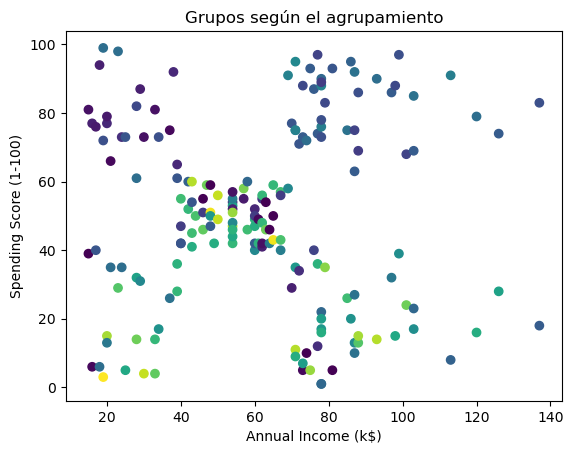

In [75]:
#Creación de modelo gráfico donde se clasifican e interpretan los resultados separados:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Age'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos según el agrupamiento')
plt.show()

Silhouette Score: 0.37104912323738015


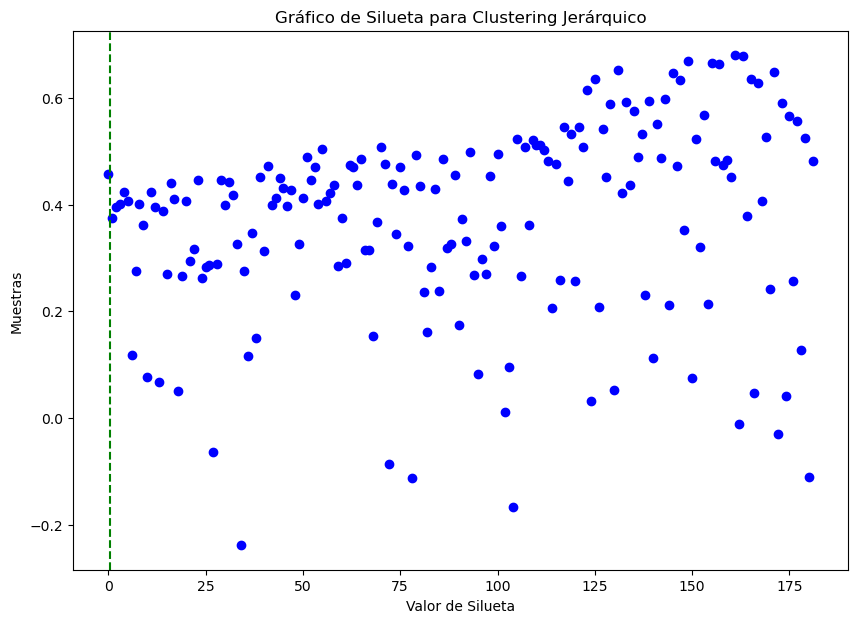

In [101]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="green", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()